# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
fraud_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [6]:
for column in fraud_df.columns:
    print("\nColumn:", column)
    print(fraud_df[column].value_counts())
    print("Number of unique values:", len(fraud_df[column].unique()))
    print("-" * 50)


Column: distance_from_home
distance_from_home
57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 1000000
--------------------------------------------------

Column: distance_from_last_transaction
distance_from_last_transaction
0.311140    1
3.640681    1
3.095558    1
3.273022    1
0.245656    1
           ..
3.680817    1
0.367765    1
0.841772    1
3.321236    1
0.318110    1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 1000000
--------------------------------------------------

Column: ratio_to_median_purchase_price
ratio_to_median_purchase_price
1.945940    1
1.161855    1
0.607566    1
1.257822    1
1.846399    1
           ..
0.612613    1
0.491743    1
1.380752    1
0.967628    1
0.386920    1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 10000

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

Value counts of fraud:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Percentage distribution:
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


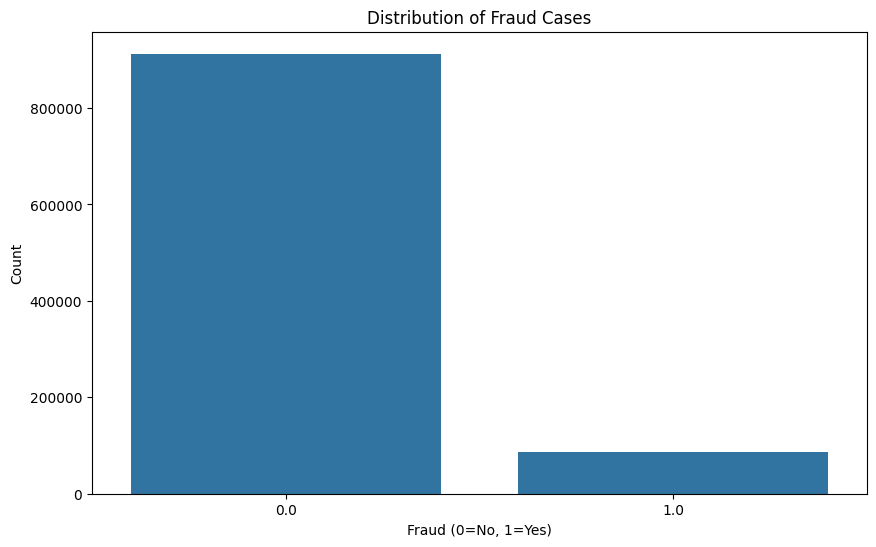

In [7]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check raw counts and percentages
print("Value counts of fraud:")
print(fraud_df['fraud'].value_counts())
print("\nPercentage distribution:")
print(fraud_df['fraud'].value_counts(normalize=True) * 100)

# Visualize distribution
plt.figure(figsize=(10,6))
sns.countplot(data=fraud_df, x='fraud')
plt.title('Distribution of Fraud Cases')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

### Step 1 Insight
- Total transactions: 1,000,000
- Legitimate transactions (0): 912,597 (91.26%)
- Fraudulent transactions (1): 87,403 (8.74%)
- Ratio approximately 10.4:1
- **Conclusion**: This is an imbalanced dataset since the ratio between classes is greater than 1:10

- **2.** Train a LogisticRegression.

In [8]:
# Split features and target
X = fraud_df.drop('fraud', axis=1)
y = fraud_df['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Understanding the Warning and Scaling

#### 0. Warning Analysis
- **Root Cause**: LogisticRegression's optimizer (lbfgs) didn't converge
- **Meaning**: Algorithm didn't find optimal coefficients within default iterations (100)

#### 1. Initial Data Analysis
- **Features with Large Ranges:**
  - `distance_from_home`: 0.004 to 8777.13
  - `distance_from_last_transaction`: 0.0001 to 11851.10
  - `ratio_to_median_purchase_price`: 0.004 to 266.69

- **Binary Features (0-1):**
  - `repeat_retailer`
  - `used_chip`
  - `used_pin_number`
  - `online_order`

#### 2. Why Scale?
- **Convergence Warning**
  - LBFGS optimizer failed to converge
  - Large feature ranges slow down optimization
  - Default 100 iterations insufficient

- **Model Impact**
  - Larger values could dominate smaller ones
  - Binary features would have minimal influence
  - Risk of numerical instability

#### 3. StandardScaler Benefits
- **Mathematical Transform:** 
  - z = (x - μ) / σ
  - Results in mean=0, std=1
  - All features contribute equally

- **Optimization Improvements:**
  - Faster convergence
  - Better numerical stability
  - Equal feature importance
  - More reliable coefficients

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain with scaled data and increased iterations
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Before scaling: Check feature ranges
print("Before scaling:")
print(X_train.describe())

# After scaling: Check feature ranges
print("\nAfter scaling:")
print(pd.DataFrame(X_train_scaled).describe())

Before scaling:
       distance_from_home  distance_from_last_transaction  \
count       800000.000000                   800000.000000   
mean            26.619659                        5.026863   
std             65.213843                       26.375663   
min              0.004874                        0.000118   
25%              3.880890                        0.296727   
50%              9.964660                        0.998402   
75%             25.742404                        3.358554   
max           8777.136420                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   800000.000000    800000.000000  800000.000000   
mean                         1.825205         0.881516       0.350356   
std                          2.794690         0.323180       0.477082   
min                          0.004399         0.000000       0.000000   
25%                          0.475573         1.000000       0.000000

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



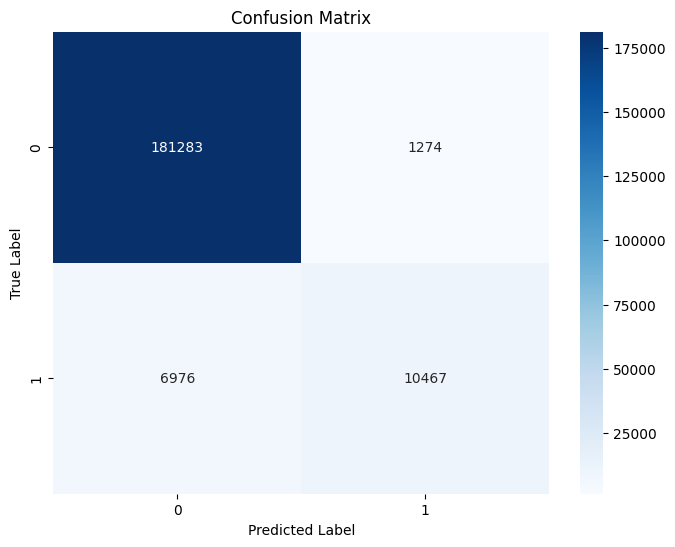

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Analysis of Classification Report for Credit Card Fraud Detection

## Classification Report:
This report provides detailed metrics for the model's performance:

- **Precision**: It tells us how many of the instances predicted as positive (label "1") were actually positive. 
  - For class "0" (negative), it is **0.96**, and for class "1" (positive), it is **0.89**.
  
- **Recall**: It measures how many actual positives (label "1") were correctly identified. 
  - For class "0", recall is **0.99**, which indicates very few false negatives. However, for class "1", recall is **0.60**, showing the model struggles with identifying positive cases (lots of false negatives).

- **F1-Score**: This is the harmonic mean of precision and recall. It balances both metrics, providing a single value that reflects the overall performance. 
  - The F1-Score for class "0" is **0.98** (good) and for class "1" is **0.72** (moderate), indicating an imbalanced performance.

- **Support**: It is the number of actual occurrences of each class in the dataset. 
  - Class "0" has **182,557** occurrences, and class "1" has **17,443** occurrences.

## Confusion Matrix:
The confusion matrix visualizes the actual versus predicted values:

- **True Positives (TP)**: This is the number of correct predictions for the positive class (class "1"). 
  - In the matrix, **10,467** instances were correctly predicted as positive.

- **False Positives (FP)**: This is the number of negative instances incorrectly predicted as positive. 
  - Here, **1,274** instances are false positives (class "0" predicted as "1").

- **True Negatives (TN)**: This is the number of correct predictions for the negative class (class "0"). 
  - Here, **181,283** instances were correctly predicted as negative.

- **False Negatives (FN)**: This is the number of positive instances incorrectly predicted as negative. 
  - The model incorrectly predicted **6,976** positive cases as negative.

## Overall Analysis:
- The model does well at predicting the negative class (class "0") with high precision, recall, and F1-score.
- It performs less well on the positive class (class "1"), with a relatively low recall of **0.60**, indicating a significant number of positive instances are being missed (false negatives).
- The model’s performance is quite skewed towards class "0", possibly due to imbalanced classes, with far more instances of class "0" than class "1".
  
This suggests that while the model is reliable for negative predictions, improvements are needed to better identify positive cases. Balancing the dataset or using techniques like oversampling/undersampling or adjusting thresholds could help improve the recall for class "1".

#### Key Insights:
- **Class Imbalance Impact**: Model performs better on majority class (legitimate transactions)
- **Critical Miss**: 40% of fraudulent transactions are missed (1 - recall for class 1)
- **False Positives**: When model predicts fraud, it's right 89% of the time
- **Business Impact**: Model misses too many frauds (poor recall on class 1), though it's precise when it does flag fraud

#### Recommendation:
Need to improve recall for fraudulent transactions while maintaining precision.

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [12]:
#pip install imbalanced-learn

Training Data Class Distribution After Oversampling:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Classification Report After Oversampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



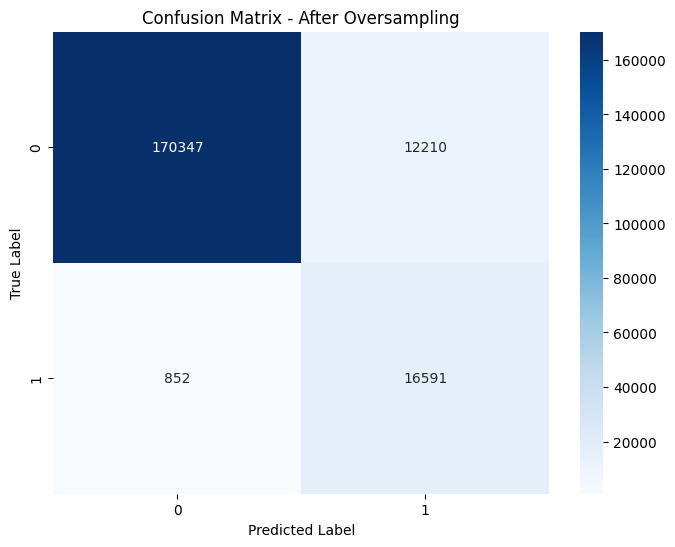

In [15]:
# Import required library
from imblearn.over_sampling import RandomOverSampler

# Initialize and apply oversampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print("Training Data Class Distribution After Oversampling:")
print(pd.Series(y_train_ros).value_counts(normalize=True) * 100)

# Train model with balanced data
model_ros = LogisticRegression(random_state=42, max_iter=1000)
model_ros.fit(X_train_ros, y_train_ros)

# Evaluate
y_pred_ros = model_ros.predict(X_test_scaled)
print("\nClassification Report After Oversampling:")
print(classification_report(y_test, y_pred_ros))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm_ros = confusion_matrix(y_test, y_pred_ros)
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After Oversampling')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Oversampling Results Analysis

#### Data Distribution
- **Before**: Imbalanced (91.26% vs 8.74%)
- **After**: Balanced (50% vs 50%)

#### Performance Comparison

**Legitimate Transactions (0.0)**
- Precision: ⬆️ Improved (0.96 → 1.00)
- Recall: ⬇️ Decreased (0.99 → 0.93)
- F1-score: ⬇️ Slight decrease (0.98 → 0.96)

**Fraudulent Transactions (1.0)**
- Precision: ⬇️ Decreased (0.89 → 0.58)
- Recall: ⬆️ Significantly improved (0.60 → 0.95)
- F1-score: = Remained same (0.72)

#### Key Insights
1. **Trade-off Observed**:
   - Better at catching fraud (higher recall)
   - More false positives (lower precision)

2. **Business Impact**:
   - Catches 95% of frauds (up from 60%)
   - But flags more legitimate transactions as fraud

3. **Overall Performance**:
   - Balanced accuracy improved
   - Better for fraud detection despite precision drop

### Understanding Oversampling in Credit Card Fraud Detection

#### 1. How Random Oversampling Works
1. **Initial Data State**
   - Majority (legitimate): 912,597 transactions
   - Minority (fraud): 87,403 transactions

2. **Process**
   ```mermaid
   graph TD
       A[Original Dataset] --> B[Identify Minority Class]
       B --> C[Randomly Select Minority Samples]
       C --> D[Duplicate Selected Samples]
       D --> E[Add to Original Dataset]
   ```

3. **Mechanics**
   - Randomly picks samples from minority class (fraud)
   - Creates exact copies of these samples
   - Adds copies to dataset until classes are balanced

#### 2. Example with Small Numbers
```python
# Before Oversampling
Legitimate: [1,2,3,4,5,6,7,8,9,10]  # 10 samples
Fraud:      [A,B]                    # 2 samples

# After Oversampling
Legitimate: [1,2,3,4,5,6,7,8,9,10]  # 10 samples
Fraud:      [A,B,A,B,A,B,A,B,A,B]   # 10 samples (duplicated)
```

#### 3. Why Results Changed
- **Higher Recall**: More fraud examples = better fraud pattern recognition
- **Lower Precision**: Duplicated patterns can lead to overfitting
- **Trade-off**: Better at finding fraud but more false alarms

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

Training Data Class Distribution After Undersampling:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Classification Report After Undersampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



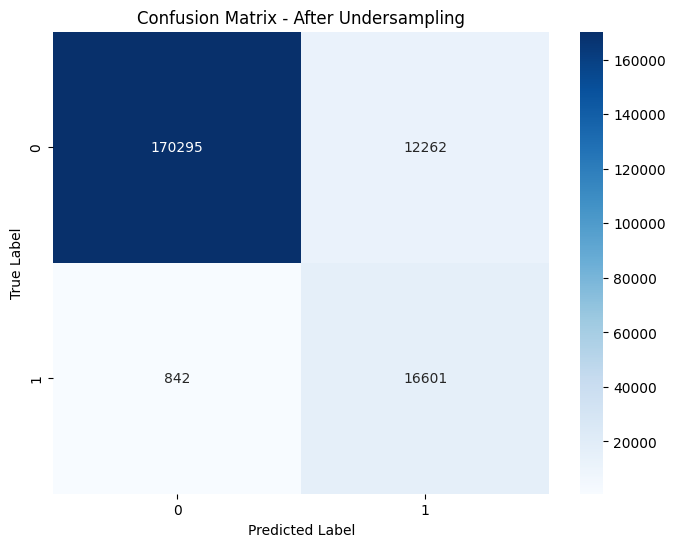

In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

# Check distribution
print("Training Data Class Distribution After Undersampling:")
print(pd.Series(y_train_rus).value_counts(normalize=True) * 100)

# Train model
model_rus = LogisticRegression(random_state=42, max_iter=1000)
model_rus.fit(X_train_rus, y_train_rus)

# Evaluate
y_pred_rus = model_rus.predict(X_test_scaled)
print("\nClassification Report After Undersampling:")
print(classification_report(y_test, y_pred_rus))

# Visualize results
plt.figure(figsize=(8, 6))
cm_rus = confusion_matrix(y_test, y_pred_rus)
sns.heatmap(cm_rus, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After Undersampling')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Undersampling Results Analysis

#### Model Comparison

| Metric | Original Model | Undersampled Model |
|--------|---------------|-------------------|
| **Distribution** | 91.26% vs 8.74% | 50% vs 50% |

#### Performance Metrics

**Legitimate Transactions (0.0)**
- Precision: 0.96 → 1.00 (⬆️ Improved)
- Recall: 0.99 → 0.93 (⬇️ Decreased)
- F1-score: 0.98 → 0.96 (⬇️ Slight decrease)

**Fraudulent Transactions (1.0)**
- Precision: 0.89 → 0.58 (⬇️ Significant decrease)
- Recall: 0.60 → 0.95 (⬆️ Major improvement)
- F1-score: 0.72 → 0.72 (= No change)

#### Key Insights
1. **Balance Achievement**:
   - Successfully balanced classes to 50-50
   - Similar results to oversampling

2. **Trade-offs**:
   - Better fraud detection (recall ⬆️)
   - More false positives (precision ⬇️)
   - Overall accuracy slightly decreased

3. **Business Impact**:
   - Catches more fraudulent transactions
   - Higher cost in terms of false alarms
   - Similar performance to oversampling

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Training Data Class Distribution After SMOTE:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Classification Report After SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



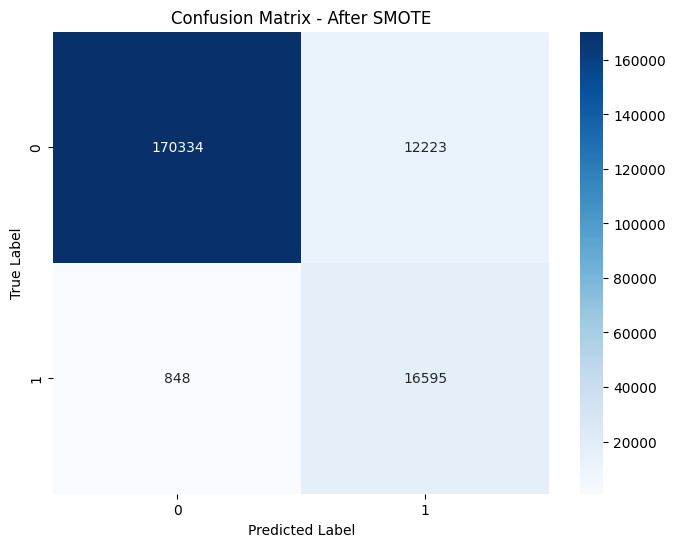

In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check distribution
print("Training Data Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True) * 100)

# Train model
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_smote = model_smote.predict(X_test_scaled)
print("\nClassification Report After SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Visualize
plt.figure(figsize=(8, 6))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After SMOTE')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### SMOTE vs Original Model Comparison

#### Class Distribution
| Method | Legitimate (0.0) | Fraud (1.0) |
|--------|-----------------|-------------|
| Original | 91.26% | 8.74% |
| SMOTE | 50% | 50% |

#### Performance Metrics

**Legitimate Transactions (0.0)**
- Precision: 0.96 → 1.00 (⬆️ Improved)
- Recall: 0.99 → 0.93 (⬇️ Decreased)
- F1-score: 0.98 → 0.96 (⬇️ Slight decrease)

**Fraudulent Transactions (1.0)**
- Precision: 0.89 → 0.58 (⬇️ Significant decrease)
- Recall: 0.60 → 0.95 (⬆️ Major improvement)
- F1-score: 0.72 → 0.72 (= No change)

#### Key Findings
1. **Similar Pattern to Other Methods**
   - SMOTE shows same trade-off pattern
   - Matches results of over/undersampling

2. **Performance Trade-offs**
   - Better at detecting frauds (recall ⬆️)
   - More false positives (precision ⬇️)
   - Overall accuracy slightly lower

3. **Business Implications**
   - Higher fraud detection rate
   - Increased false alarms
   - No significant advantage over simpler methods

### Comparison of All Methods for Credit Card Fraud Detection

| Metric | Original | Oversampling | Undersampling | SMOTE |
|--------|----------|--------------|---------------|-------|
| **Class Distribution** | 91.26% vs 8.74% | 50% vs 50% | 50% vs 50% | 50% vs 50% |
| **Legitimate (0.0)** |
| Precision | 0.96 | 1.00 | 1.00 | 1.00 |
| Recall | 0.99 | 0.93 | 0.93 | 0.93 |
| F1-score | 0.98 | 0.96 | 0.96 | 0.96 |
| **Fraudulent (1.0)** |
| Precision | 0.89 | 0.58 | 0.58 | 0.58 |
| Recall | 0.60 | 0.95 | 0.95 | 0.95 |
| F1-score | 0.72 | 0.72 | 0.72 | 0.72 |

### Analysis of Results

1. **Similar Results Across Balancing Methods**
   - All balancing techniques (Oversampling, Undersampling, SMOTE) produced identical metrics
   - This suggests the class imbalance itself, not the method of correction, was the main issue

2. **Trade-offs After Balancing**
   - **Precision**: Decreased for fraud detection (0.89 → 0.58)
   - **Recall**: Significantly improved for fraud (0.60 → 0.95)
   - **F1-score**: Remained constant (0.72)

3. **Why Similar Results?**
   - All methods achieved 50-50 balance
   - Equal class representation leads to similar decision boundaries
   - Model treats both classes with equal importance

4. **Business Impact**
   - **Original Model**: More conservative, fewer false alarms but missed frauds
   - **Balanced Models**: Better at catching fraud but more false alarms
   - Trade-off between precision and recall becomes evident

5. **Recommendation**
   - Choice of method depends on business priority:
     - If missing fraud is costly: Use balanced approach
     - If false alarms are costly: Stick with original model
   - Consider cost-sensitive learning or threshold adjustment instead

The similarity in results suggests that the key factor was achieving balance, rather than the specific method used to achieve it.

### Plan for Analyzing Different Outcomes of Sampling Methods

1. **Data Characteristics Impact**
2. **Method-Specific Scenarios**
3. **Performance Differences**

### Cases Where Methods Would Differ

#### 1. Data Distribution and Feature Space
- **Oversampling**
  - Best: When minority class has clear, distinct patterns
  - Worst: When minority class has noise/outliers (duplicates noise)
  - Example: Credit card transactions with clear fraud patterns

- **Undersampling**
  - Best: Large majority class with redundant information
  - Worst: When majority class has important, unique patterns
  - Example: Disease diagnosis where healthy cases are similar

- **SMOTE**
  - Best: Complex feature relationships, continuous variables
  - Worst: Categorical features, sparse feature space
  - Example: Image classification, where interpolation makes sense

#### 2. Dataset Size Impact
- **Oversampling**
  - Large datasets: Memory intensive
  - Small datasets: Risk of overfitting

- **Undersampling**
  - Large datasets: Efficient, maintains performance
  - Small datasets: Loss of important information

- **SMOTE**
  - Large datasets: Computationally expensive
  - Small datasets: Better than simple oversampling

#### 3. Real-World Examples
1. **Text Classification**
   - Undersampling preferred (maintains authentic language patterns)
   - SMOTE less effective (synthetic text might be meaningless)

2. **Medical Imaging**
   - SMOTE/Oversampling better (preserves rare disease cases)
   - Undersampling risky (might lose critical disease patterns)

3. **Financial Fraud**
   - All methods similar (structured, numerical data)
   - Explains our lab results

In our case, results were similar because:
- Well-structured numerical data
- Clear fraud patterns
- No complex feature interactions
- Balanced ratio achievement was key factor